# Исследование данных о российском кинопрокате



## Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Особенно важно уделить внимание фильмам, которые получили государственную поддержку, и ответить на вопрос, насколько такие фильмы интересны зрителю. 
Работа будет проведена с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

План проекта:
- Предобработка данных, включающая в себя: заполнение пропусков в данных, удаление дубликатов, изменение типов данных, а также нахождение аномалий и необычных значений в столбцах с категориальными и количественными значениями.
- Добавление новых столбцов для дальнейшей работы с данными
- Исследование динамики сборов фильмов по годам
- Изучение влияния возрастного ограничения на сборы фильмов
- Исследование фильмов с гос. поддержкой, выявление интересных закономерностей
- Общий вывод

### Информация о данных

In [1]:
import string
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
print(data_1.head())
data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
data_2.head()


                  title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           produ

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Изучим общую информацию о датасетах

In [3]:
print(data_1.info())
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

### Произведем слияние датасетов

Найдем строковые значения в столбце puNumber и удалим строки с ними, затем переведем весь столбец в формат int.

In [4]:
sorted(data_1['puNumber'].unique(), reverse=True)[0:10] 
data_1 = data_1.loc[data_1['puNumber'] != 'нет'] 
data_1['puNumber'] = data_1['puNumber'].astype('int64')


Соединим таблицы по столбцу puNumber таким образом, чтобы сохранились все строки из первой таблицы.



In [5]:
data = data_1.merge(data_2, on='puNumber', how='left')





Проведем проверку. Убедимся, что информация в о датасете data и data_1 в их общих столбцах совпадает, а также что совпадает количество пропусков в срезе data и датасете data_1. 

In [6]:
print(data.info(), data_1.info(), data.loc[:, 'title':'genres'].isna().sum().sum(), data_1.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Посмотрим еще раз на данные

In [7]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Пропуски

In [8]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

#### Переименование 

In [9]:
data = data.rename(columns={'puNumber' : 'punumber'})

## Шаг 2. Предобработка данных

### Преобразование типов данных

Преобразования не помешали бы в столбце ratings. Есть строковые значения, их нужно удалить или перевести в тип float.
Также значения из show_start_date необходимо привести к типу datetime.


#### ratings

In [10]:
#data['ratings'] = data['ratings'].astype('float64') #исходя из ошибки, видимо, есть какое-то количество значений в процентах
data['ratings'] = data['ratings'].astype('str')
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float64')
data.query('ratings > 10')['ratings'].count() #значений выше 10 немного, скорее всего, все они вызваны записью в процентах
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10 #поделим эти значения на 10, чтобы перевести в десятичную шкалу


#### show_start_date

In [11]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d').dt.tz_localize(None)



                                 
    

### Шаг 2.2. Изучим пропуски в датафрейме




In [12]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

#### film_studio, production_country, director
Пропусков мало, придумать что-либо сложно => можно просто удалить

In [13]:
print(data['film_studio'].isna().sum(),
data['production_country'].isna().sum(),
data['director'].isna().sum())




                                 
    

18 2 9


In [14]:
data = data.query('~film_studio.isna()')
data = data.query('~production_country.isna()')
data = data.query('~director.isna()')

#### producer
Пропусков много, удалять данные жалко. Заменить на наиболее вероятное значение получится вряд ли, поэтому лучше заменить на unknown.

In [15]:
data['producer'] = data['producer'].fillna('unknown')

#### refundable_support, nonrefundable_support, budget, financing_source      
Если эти данные не указаны, скорее всего, фильм просто не получал государственной поддержки. Поэтому оставим как есть.


#### ratings
Каким-либо разумным или наиболее вероятным значением заменить не получится => лучше оставить пропуски незаполненными.

In [16]:
data['ratings'] = data['ratings'].astype('object')
data.query('ratings == "Series([], )"')['ratings'].count()
data.loc[data['ratings'] == "Series([], )", 'ratings'] = None
data['ratings'] = data['ratings'].astype('float64')
data.isna().sum()


title                       0
punumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   947
genres                    956
box_office               4303
dtype: int64

#### genres
Пропусков довольно много, удалив строки с ними, мы потеряем множество данных. Лучше заполнить на unknown. 

In [17]:
data['genres'] = data['genres'].fillna('unknown')

#### box office
Очевидно, в данном столбце пропуск означает, что фильм не был в российском прокате.

In [2]:
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

NameError: name 'temp' is not defined

### Шаг 2.3. Изучим дубликаты в датафрейме


#### Шаг 2.4. Изучим категориальные значения


##### Проблемы, встречающиеся в категориальных данных:
- Перечисление значений в разных комбинациях, что не позволяет проводить корректную группировку
- Перечисление через разные сепараторы
- Пробелы по краям строк

##### Какая работа проведена: 
- Убраны пробелы по краям строк
- Знаки препинания приведены к единому формату там, где это возможно
- Удалены дубликаты

Теперь возможно решение проблемы перечисления путем выделения первых значений в отдельный столбец или разбиения значений на множества. Однако для дальнейшего анализа подобные преобразования понадобятся только для столбцов genres & director. Эти преобразования будут выполнены в другом разделе.

In [19]:
data['director'].unique()[0:100]
data['production_country'].unique()[0:100]
data['producer'].unique()


array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Приведем данные к единому формату

In [20]:
data.duplicated().sum()
data.columns
for i in list(data.columns) :
    if data[i].dtype == 'object' :
        data[i] = data[i].str.lower()
        data[i] = data[i].str.strip()
        data[i] = data[i].str.replace('-', ',')
        data[i] = data[i].str.replace(', ', ',')
        data[i] = data[i].str.replace(' - ', ',')
data.head()
data = data.drop_duplicates(subset=['title', 'punumber', 'director']) #самые важные параметры для выявления дубликатов
data.head(20)


,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз,кобальт пикчерз,бикон пикчерз...",сша,кевин костнер,"дэвид валдес,кевин костнер,джейк эбертс","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,"«6+» ,для детей старше 6 лет",NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
5,остановился поезд,111013816,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,unknown,"«6+» ,для детей старше 6 лет",NaN,NaN,NaN,NaN,7.70,драма,NaN
6,любовь и голуби,111007013,2013-10-18 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,unknown,"«12+» ,для детей старше 12 лет",NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,любовь и сигареты,221074614,2014-12-29 12:00:00,художественный,"юнайтед артистс,грин стрит филмз,айкон интерте...",сша,джон туртурро,"джон пенотти,джон туртурро","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,художественный,"пульсар продюксьон,тф1 фильм",франция,эрик беснард,патрис леду,"«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм"",телевидение внр","ссср,венгрия",в.титов,unknown,"«12+» ,для детей старше 12 лет",NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN


#### Шаг 2.5. Проверим количественные значения



В столбце budget есть нулевые значения, хотя при этом в этих же строках есть данные по государственной поддержке. Так как мы ничего не знаем про другие составляющие бюджета, имеет смысл заполнить  нулевые значения в budget суммой значений из refundable_support и nonrefundable_support

In [21]:
#data.loc[~data['refundable_support'].isna()][['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].head(20)
#mean_own_budget = ((data.query('~nonrefundable_support.isna() & budget != 0')['budget'] - data.query('~nonrefundable_support.isna() & budget != 0')['refundable_support'] - data.query('~refundable_support.isna()')['nonrefundable_support']) / (data.query('~nonrefundable_support.isna() & budget != 0')['refundable_support'] + data.query('~refundable_support.isna()')['nonrefundable_support'])).mean()
data.loc[data['budget'] == 0, 'budget'] = data.loc[data['budget'] == 0, 'refundable_support'] + data.loc[data['budget'] == 0, 'nonrefundable_support'] 
data.loc[data['budget'] == 0, 'budget'].count()


0

Также необходимо проверить, существуют ли строки с бюджетом меньшим чем сумма гос.поддержки.
upd их нет

In [22]:
data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]


,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


#### Выявление аномалий

[[<AxesSubplot:title={'center':'punumber'}>
  <AxesSubplot:title={'center':'show_start_date'}>
  <AxesSubplot:title={'center':'refundable_support'}>]
 [<AxesSubplot:title={'center':'nonrefundable_support'}>
  <AxesSubplot:title={'center':'budget'}>
  <AxesSubplot:title={'center':'ratings'}>]
 [<AxesSubplot:title={'center':'box_office'}> <AxesSubplot:>
  <AxesSubplot:>]]


,punumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,458.00",332.00,332.00,332.00,"6,511.00","3,155.00"
mean,"135,214,429.91","11,864,457.83","48,980,988.89","131,422,395.80",6.49,"76,551,328.80"
std,"38,359,046.05","24,916,555.26","59,980,117.92","187,148,242.67",1.11,"240,455,853.44"
min,"1,811,096.00",0.00,0.00,"6,000,000.00",1.00,0.00
25%,"113,000,117.25",0.00,"25,000,000.00","45,524,799.50",5.90,"87,090.50"
50%,"121,015,514.50",0.00,"30,000,000.00","71,196,901.50",6.60,"2,338,049.90"
75%,"124,003,288.75","15,000,000.00","40,375,000.00","150,000,000.00",7.20,"23,995,460.84"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


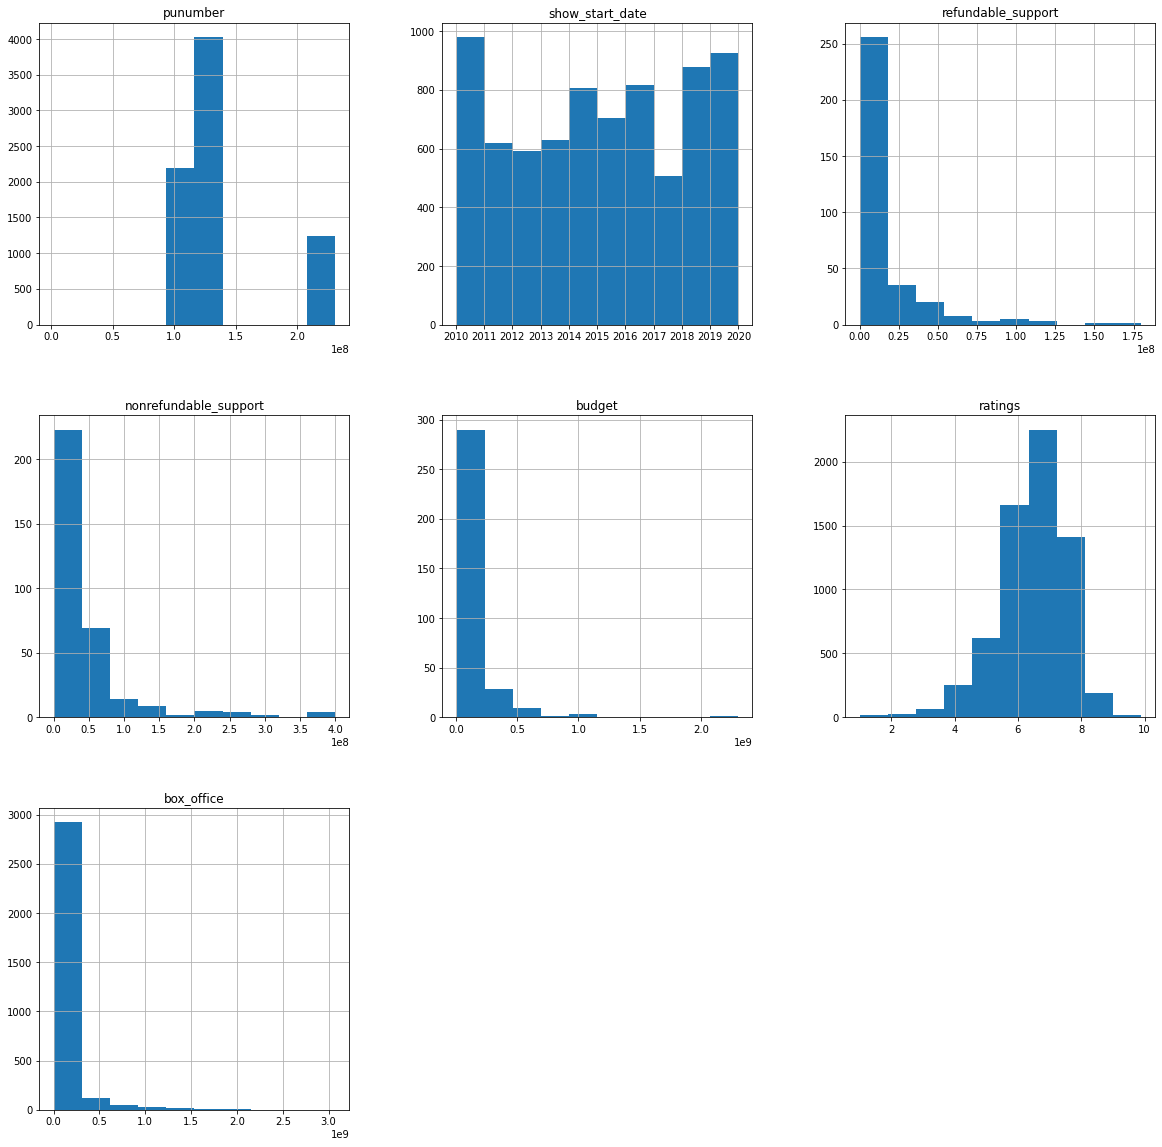

In [23]:
print(data.hist(figsize=(20,20)))
data.describe()

##### box_office
В описании данных столбца box_office видно, что минимальное значение = 0. Такого быть не может. Я выяснил, что информации по денежным сборам советских фильмов попросту не может быть, поэтому их сборы лучше заменить на пропуски. Таким же образом лучше поступить и с фильмами производства других стран, сборы которых меньше 10000 (это слишком мало, скорее всего, сборы в таких фильмах указаны в тысячах или миллионах, но мы этого узнать не можем).

In [24]:
data.query('box_office == 0')['box_office'].count()
data.query('box_office < 10000')['film_studio'].value_counts()
data.loc[data['production_country'] == "ссср", 'box_office'] = None
data.loc[data['box_office'] < 10000, 'box_office'] = None

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [1]:
data['year'] = data['show_start_date'].dt.year


NameError: name 'data' is not defined

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [26]:
#data['director'].unique()[0:100]
def main(column) :
    column = str(column)
    return column.strip().split(',')[0]
data['main_director'] = data['director'].apply(main)
data['main_genre'] = data['genres'].apply(main)
data.head()

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз,кобальт пикчерз,бикон пикчерз...",сша,кевин костнер,"дэвид валдес,кевин костнер,джейк эбертс","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,"«6+» ,для детей старше 6 лет",NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,е.матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз,кикстарт продакшнз,марк плат...",сша,тимур бекмамбетов,"джим лемли,джейсон нетер,марк е.платт,яйн смит","«18+» ,запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,тимур бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [27]:
data['gov_support_to_whole'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']


#### Выводы по предобработке:
- Произведено слияние двух датасетов с сохранением всех значений из mkrf_movies 
- Изменены типы данных в столбцах ratings и show_start_date
- Обработаны пропуски в столбцах film_studio, production_country, director, producer, budget, genres, box_office
- Категориальные значения приведены к единому формату
- Удалены ставшие явными дубликаты
- Выявлены и обработаны количественные аномалии в столбцах budget и box_office
- Добавлены новые столбцы для дальнейшей работы с данными: год премьеры, главный режиссер, главный жанр, доля гос. поддержки в общем бюджете


### Шаг 3. Проведите исследовательский анализ данных


#### Количество фильмов в прокате
- Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Доля фильмов, побывавших в прокате: 0.3492893537141325


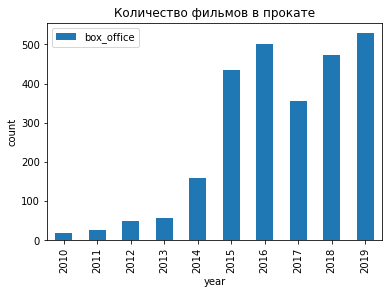

In [28]:
data.pivot_table(index='year', values='box_office', aggfunc='count').reset_index().plot(kind='bar', x='year', y='box_office', ylabel='count', title='Количество фильмов в прокате')
print('Доля фильмов, побывавших в прокате:', data['box_office'].count() / data['punumber'].count())


#### Динамика суммы сборов
Изучим, как менялась динамика проката по годам.

0    2010
Name: year, dtype: int64 2274770.0
8    2018
Name: year, dtype: int64 49668361909.31999


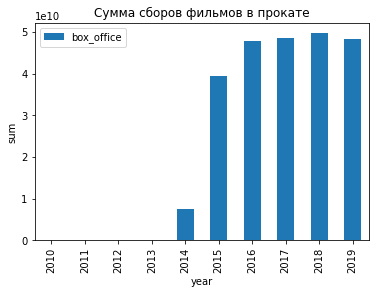

In [29]:
sum_box = data.pivot_table(index='year', values='box_office', aggfunc='sum').reset_index()
sum_box.plot(kind='bar', x='year', y='box_office', ylabel='sum', title='Сумма сборов фильмов в прокате')
print(sum_box.loc[sum_box['box_office'] == sum_box['box_office'].min()]['year'], sum_box['box_office'].min())
print(sum_box.loc[sum_box['box_office'] == sum_box['box_office'].max()]['year'], sum_box['box_office'].max())

- Меньше всего фильмов в прокате было в 2010 году (не более 20), больше всего - в 2019(более 500). Наблюдается тенденция повышения количества фильмов, вышедших в прокат с каждым годом. Однако такой разрыв между отрезками 2010-2013 и 2014-2019 каждется подозрительным. Возможно, данные просто стали собираться лучше или понятие проката расширилось, например, стали учитывать небольшие камерные кинотеатры.

- Самая большая сумма сборов была в 2018 году и равнялась 49668361909, самая маленькая была в 2010 и равнялась 2274770.

- с 2016 года сумма сборов не растет и держится на уровне 50 млрд.

#### Среднее и медиана  сборов
- Самое высокое среднее значение сборов было в 2017 году и составляло 140 000 000. До 2014 года фильмы не собирали и миллиона. Опять же, на мой взгляд, проблемы в самих данных. Как минимум, из прошлого пункта понятно, что выборка слишком мала.

Среднее:


,year,box_office
0,2010,"113,738.50"
1,2011,"514,028.00"
2,2012,"137,391.08"
3,2013,"525,011.54"
4,2014,"46,821,500.36"
5,2015,"91,006,774.94"
6,2016,"95,350,711.87"
7,2017,"136,414,885.72"
8,2018,"104,785,573.65"
9,2019,"91,715,335.62"


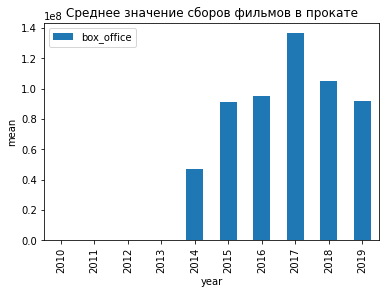

In [30]:
print('Среднее:')
data.pivot_table(index='year', values='box_office', aggfunc='mean').reset_index().plot(kind='bar', x='year', y='box_office', ylabel='mean', title='Среднее значение сборов фильмов в прокате')
data.pivot_table(index='year', values='box_office', aggfunc='mean').reset_index()


Медиана:


,year,box_office
0,2010,"23,612.50"
1,2011,"42,691.00"
2,2012,"30,500.00"
3,2013,"32,582.50"
4,2014,"346,964.00"
5,2015,"6,966,965.35"
6,2016,"4,683,779.79"
7,2017,"10,177,833.50"
8,2018,"8,911,533.94"
9,2019,"4,693,586.59"


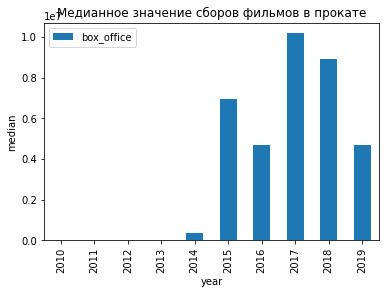

In [31]:
print('Медиана:')
data.pivot_table(index='year', values='box_office', aggfunc='median').reset_index().plot(kind='bar', x='year', y='box_office', ylabel='median', title='Медианное значение сборов фильмов в прокате')
data.pivot_table(index='year', values='box_office', aggfunc='median').reset_index()


#### Возрастное ограничение и сборы 
- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

Выводы по суммарным значениям:
- Cуммарно самые большие сборы в категории фильмов для детей старше 16. Скорее всего, таких фильмов попросту больше всего. В этом мы убедимся, посмотрев на среднее.
- Линейной зависимости между возрастным ограничением и количеством сборов нет.
- С 15 по 19 год наблюдается рост сборов фильмов с ограничением 18+
- В 17 году рост сборов фильмов 16+ сменяется ппадением. С другой стороны, в том же году падение фильмов 12+ сменяется ростом. Скорее всего, это просто совпадение, но у меня есть некоторые предположения: 1) возможно, в этом году поменялись критерии определения возрастной отметки фильмов 2) эти категории являются конкурирующими за подростковую аудиторию, поэтому рост числа фильмов в одной категории, чем бы он ни был вызван, повысит конкуренцию для фильмов из другой категории и снизит их посещаемость.

Выводы по средним значениям:
- Несмотря на то, что самые большие суммарные сборы у фильмов категории 16+, топ по средним значениям делят фильмы 12+ и 6+. Можем сделать вывод о том, что детские фильмы приносят более высокие сборы в среднем, чем фильмы других категорий, хотя взрослых фильмов снимается больше.
- Среднее значение сборов фильмов 18+ не растет, что говорит о том, что рост суммарных сборов обусловлен ростом количества фильмов с такой отметкой. Есть два расклада: 1) ужесточаются критерии определения фильма как взрослого, все больше и больше фильмов попадают в эту категорию 2) растет спрос и следовательно предложение на фильмы с элементами насилия или эротики
- В 17 году рост средних сборов фильмов 16+ сменился на падение.

In [32]:
data['age_restriction'] = data['age_restriction'].str.split(' ,').str[0]
data['age_restriction'].unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

In [33]:
data.groupby('age_restriction')['box_office'].count()

age_restriction
«0+»     168
«12+»    393
«16+»    879
«18+»    827
«6+»     338
Name: box_office, dtype: int64

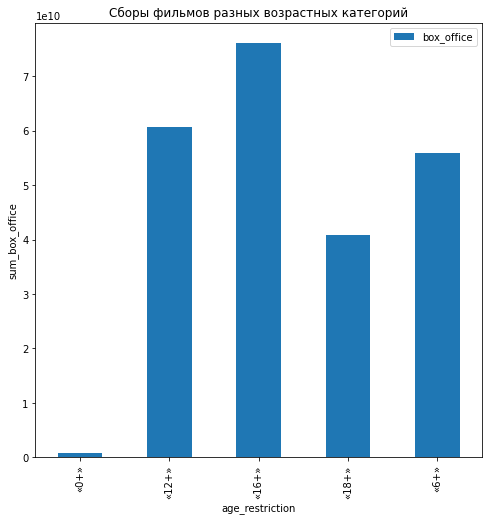

In [34]:

import matplotlib.pyplot as plt

data.query('year > 2014').pivot_table(index='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(8,8), ylabel='sum_box_office', title='Сборы фильмов разных возрастных категорий')
plt.show()

<AxesSubplot:title={'center':'Сборы фильмов разных возрастных категорий по годам'}, xlabel='year', ylabel='sum_box_office'>

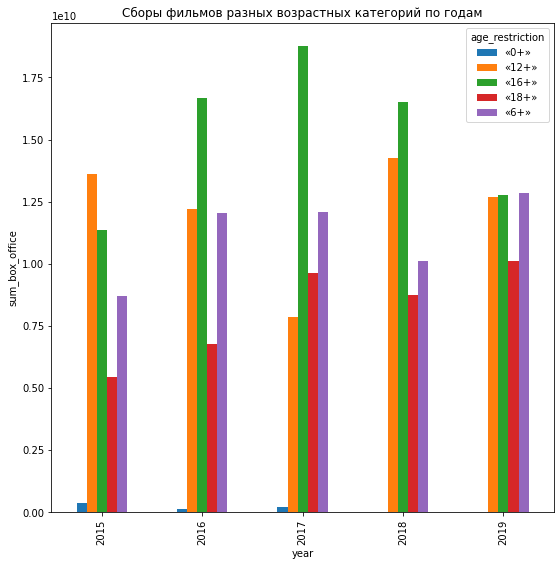

In [35]:
data.query('year > 2014').pivot_table(index='year', values='box_office', columns='age_restriction', aggfunc='sum').plot(kind='bar', figsize=(9,9), ylabel='sum_box_office', title='Сборы фильмов разных возрастных категорий по годам')
                                                  

<AxesSubplot:title={'center':'Средние сборы фильмов разных возрастных категорий'}, xlabel='age_restriction', ylabel='mean_box_office'>

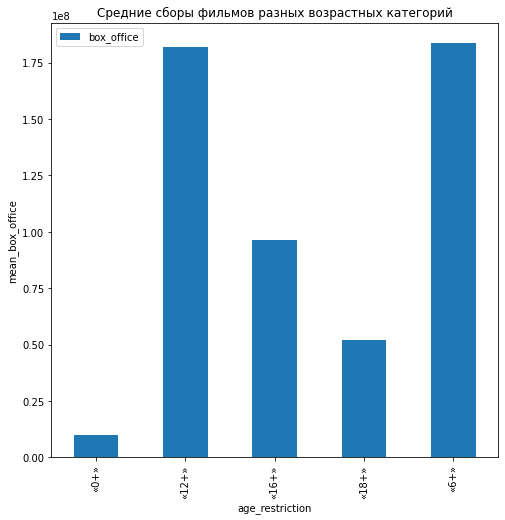

In [36]:
data.query('year > 2014').pivot_table(index='age_restriction', values='box_office', aggfunc='mean').plot(kind='bar', figsize=(8,8), ylabel='mean_box_office', title='Средние сборы фильмов разных возрастных категорий')

<AxesSubplot:title={'center':'Средние сборы фильмов разных возрастных категорий'}, xlabel='year', ylabel='mean_box_office'>

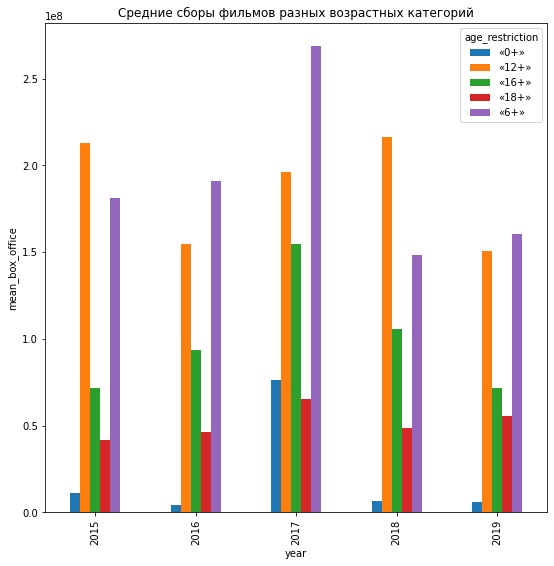

In [37]:
data.query('year > 2014').pivot_table(index='year', values='box_office', columns='age_restriction', aggfunc='mean').plot(kind='bar', figsize=(9,9), ylabel='mean_box_office', title='Средние сборы фильмов разных возрастных категорий')

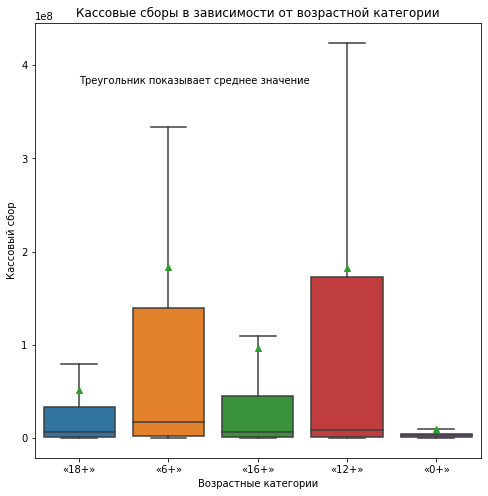

In [38]:
import seaborn as sns
temp = data.copy()
year_mask = (temp['year'] >= 2015) & (temp['year'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.8e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


#### Среднее значение гос. поддержки. Соотношение возвратных и невозвратных средств.
Среднее значение государственной поддержки составляет 60 845 446 рублей. 
Среднее соотношение государственной поддержки к общему бюджету фильмов примерно равно 1/2. При этом есть фильмы, полностью профинансированные государством.
Средняя доля возвратных средств в общей сумме гос. поддержки составляет 0.14. Это немного.

In [39]:
data_support = data.query('~budget.isna()')
data_support['support'] = data_support['refundable_support'] + data_support['nonrefundable_support']
print(data_support['support'].mean(), 
(data_support['support'] / data_support['budget']).describe(), 
(data_support['refundable_support'] / (data_support['nonrefundable_support'] + data_support['refundable_support'])).mean())


60845446.72289157 count   332.00
mean      0.54
std       0.20
min       0.04
25%       0.38
50%       0.61
75%       0.66
max       1.00
dtype: float64 0.1406050393333901


/tmp/ipykernel_592/2717014709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['support'] = data_support['refundable_support'] + data_support['nonrefundable_support']


#### Источники помощи
- Больше всего денег дает в среднем Фонд кино - 100 млн. Из них только четверть возвратные. Министерство культуры в среднем дает меньше, около 30млн, причем только невозвратных средств. 

<AxesSubplot:title={'center':'Размер средней поддержки по источникам'}, xlabel='financing_source'>

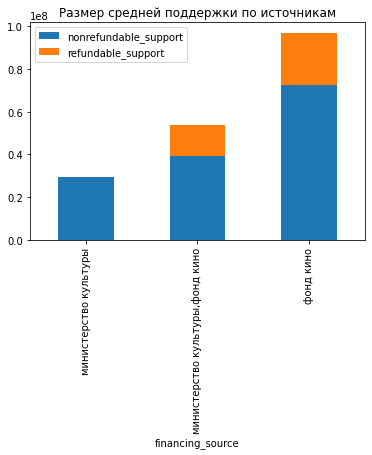

In [40]:
data['financing_source'].unique()
data_support.pivot_table(index='financing_source', values=['refundable_support', 'nonrefundable_support'], aggfunc='mean').reset_index().plot(kind='bar', x='financing_source', stacked=True, title='Размер средней поддержки по источникам')

#### Окупаемость фильмоф с гос.поддержкой
- Окупается лишь четверть фильмов с государственной поддержкой. Большинство фильмов с гос. поддержкой имеют убытки до 200 млн. Однако фильмов, приносящих колоссальную прибыль, сильно больше, чем фильмов, приносящих колоссальные убытки. Поэтому среднее сильно выше медианы.
- Зависимости между долей гос денег в бюджете и окупаемостью фильма нет

In [41]:
print(data_support.loc[(data_support['box_office'] - data_support['budget']) > 0]['budget'].count() / 332)
data_support['profit'] = data_support['box_office'] - data_support['budget']
print(data_support['profit'].describe())



0.23795180722891565
count              314.00
mean         1,320,630.94
std        317,812,039.65
min     -1,971,477,243.41
25%        -70,061,013.25
50%        -40,325,612.25
75%           -353,885.47
max      2,913,568,690.79
Name: profit, dtype: float64


/tmp/ipykernel_592/1789765237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['profit'] = data_support['box_office'] - data_support['budget']


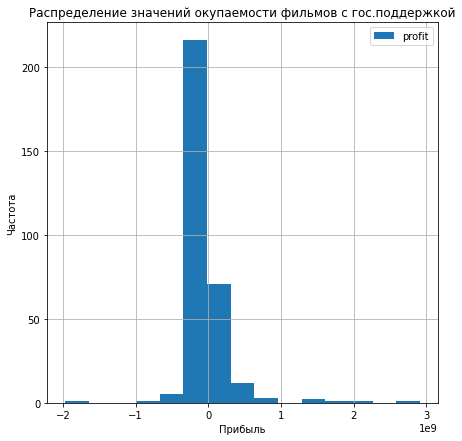

In [42]:
import matplotlib.pyplot as plt
data_support['profit'].hist(figsize=(7,7), bins=15)
plt.title('Распределение значений окупаемости фильмов с гос.поддержкой')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.legend(['profit'])
plt.show()

/tmp/ipykernel_592/1754466605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['support_to_budget'] = data_support['support'] / data_support['budget']


<AxesSubplot:title={'center':'Рассение прибыли в зависимости от доли гос.поддержки'}, xlabel='support_to_budget', ylabel='profit'>

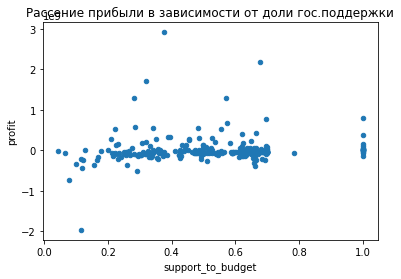

In [43]:
data_support['support_to_budget'] = data_support['support'] / data_support['budget']
data_support.plot(kind='scatter', x='support_to_budget', y='profit', title='Рассение прибыли в зависимости от доли гос.поддержки')


#### рейтинг фильмов с гос. поддержкой
- Средний рейтинг фильмов с гос.поддержкой = 6, что почти не отличается от среднего рейтинга фильмов без гос.поддержки. Это же касается и остальных параметров (отклонение, медиана).
- Зависимость между долей гос. финансирования и рейтингом фильма отсутствует


In [44]:
print(data_support['ratings'].describe())
data.query('budget.isna()')['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64


count   6,195.00
mean        6.51
std         1.11
min         1.10
25%         5.90
50%         6.60
75%         7.30
max         9.90
Name: ratings, dtype: float64

<AxesSubplot:title={'center':'Рассеяние рейтинга в зависимости от доли гос.поддержки'}, xlabel='support_to_budget', ylabel='ratings'>

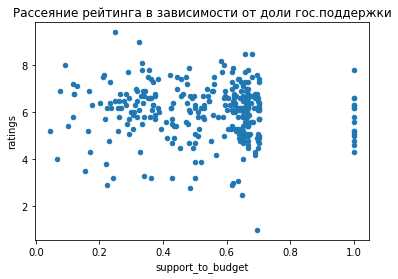

In [45]:

data_support.plot(kind='scatter', x='support_to_budget', y='ratings', title='Рассеяние рейтинга в зависимости от доли гос.поддержки')

#### Сборы фильмов с гос. поддержкой
Зависимости между долей гос.поддержки в общем бюджете фильма и сборами нет. У меня была гипотеза, что фильмы с гос. поддержкой лучше пиарятся (при поддержке гос. каналов), в целом ориентированы на массовую публику, поэтому и их суммарные сборы должны быть выше.

<AxesSubplot:title={'center':'Рассеяние сборов в зависимости от доли гос. поддержки'}, xlabel='support_to_budget', ylabel='box_office'>

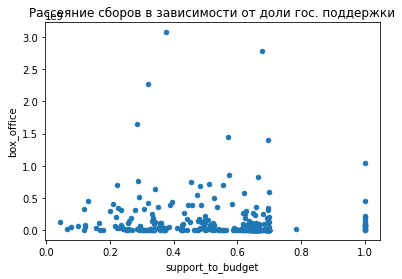

In [46]:
data_support.plot(kind='scatter', x='support_to_budget', y='box_office', title='Рассеяние сборов в зависимости от доли гос. поддержки')

#### Жанр и гос. поддержка
- Распределение жанров для фильмов с гос. поддержкой не отличается от распределения жанров для всех фильмов за одним исключением: комедийные фильмы занимают бОльшую долю. В остальном какой-то спефицики выделения средств по жанрам нет.

/tmp/ipykernel_592/4061141978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['main_genre_2'] = data_support['main_genre'].apply(genre_category)


<AxesSubplot:ylabel='фильмы с гос. поддержкой'>

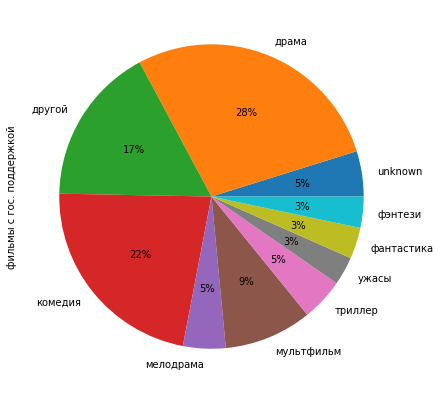

In [47]:
# Жанры фильмов с гос. поддержкой
def genre_category(column) :
    if data_support.loc[data_support['main_genre'] == column]['main_genre'].count() < 10 :
        return('другой')
    else :
        return(column)
data_support['main_genre_2'] = data_support['main_genre'].apply(genre_category)
data_support.groupby('main_genre_2')['punumber'].count().plot(kind='pie', ylabel='фильмы с гос. поддержкой', figsize=(7,7), autopct='%1.0f%%')


<AxesSubplot:ylabel='все фильмы'>

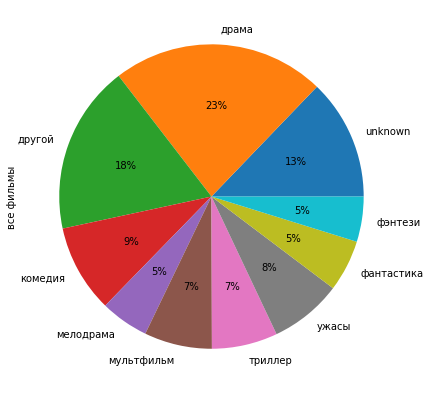

In [48]:
data['main_genre_2'] = data['main_genre'].apply(genre_category)
data.groupby('main_genre_2')['punumber'].count().plot(kind='pie', ylabel='все фильмы', figsize=(7,7), autopct='%1.0f%%')

### Шаг 5. Выводы

#### Важные наблюдения и рекомендации для дальнейших исследований

##### Прокат и сборы
- С каждым годом число фильмов, вышедших в прокат, растет. Однако странными кажутся данные до 2014 года, то же касается и средних сборов. Это задел для дальнейшей работы и исследований - разобраться, почему фильмов в прокате до 2014 года так мало и почему у них такие аномально маленькие сборы.
- с 2016 года сумма сборов остается примерно на одном уровне, рынок кинопроката стагнирует.
- Самое высокое среднее значение сборов было в 2017 году и составляло 140 000 000. Интересно было бы исследовать специфику этого года, проанализировать, чем вызван успех фильмов, вышедших в 2017, что происходило в киноиндустрии в этом году.

##### Возрастное ограничение
- Линейной зависимости между возрастным ограничением и количеством сборов нет.
- В 17 году рост сборов фильмов 16+ сменяется падением. С другой стороны, в том же году падение фильмов 12+ сменяется ростом. По графикам видно, что динамика этих двух категорий как бы противонаправлена. Возможно, существует связь. Для дальнейшего исследования и подтверждения гипотезы имеет смысл обратить внимание на юридические изменения в области возрастных ограничений и тренды в кино.
- С 15 по 19 год наблюдается рост сборов фильмов с ограничением 18+. Аналогично, дальнейшее исследование предполагает изучение юридических изменений и трендов в киноиндустрии.
- Детские фильмы имеют самые большие сборы.

##### Фильмы с гос. поддержкой
- Среднее соотношение гос. поддержки к общему бюджету фильмов с гос. поддержкой составляет чуть больше половины
- На удивление, в среднем доля возвратных средств в сумме общей поддержкки равна 0.14.
- Окупается лишь четверть фильмов с государственной поддержкой. Однако это ничего не говорит об их качестве, потому что мы не можем провести сравнительный анализ. Дальнейшее исследование предполагает сбор данных о бюджете фильмов без государственной поддержки.
- Зависимости между долей гос. денег в бюджете и окупаемостью фильма нет. Это может указывать на то, что связь между гос. финансированием и успешностью (речь прежде всего о финансках, но не только о них) отсутствует.
- Рейтинг фильмов с гос. поддержкой по всем параметрам почти не отличается от рейтинга фильмов без гос. поддержки.
- Комедийных фильмов в долях больше в категории фильмов с гос. поддержкой. Скорее всего, это всего лишь корреляция. Просто в россии любят снимать комедии (а фильмы с гос. поддержкой - все российского производства).


